In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import random as random
# from tqdm import tqdm


# path = '../data/movie_lens_small/ratings.csv'

# movies = pd.read_csv(path)

# # en este prepro me falta borrar los items que tienen poco overlapp y 
# # los usuarios que tienen pocas interacciones

# user_item_matrix = pd.pivot_table(movies,
#                                 index='userId',
#                                 columns='movieId',
#                                 values='rating')

# #me guardo los raw ids, para luego volver a convertir
# raw_users_ids = user_item_matrix.index
# raw_item_ids = user_item_matrix.columns

# user_item_matrix.reset_index(inplace= True, drop= True)
# user_item_matrix.columns = np.arange(user_item_matrix.shape[1])

# user_item_matrix.info()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
from tqdm import tqdm


path = '../data/movie_lens_small/ratings.csv'

movies = pd.read_csv(path)

# en este prepro me falta borrar los items que tienen poco overlapp y 
# los usuarios que tienen pocas interacciones

user_item_matrix = pd.pivot_table(movies,
                                index='userId',
                                columns='movieId',
                                values='rating')

user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Histograma en escala logaritmica 

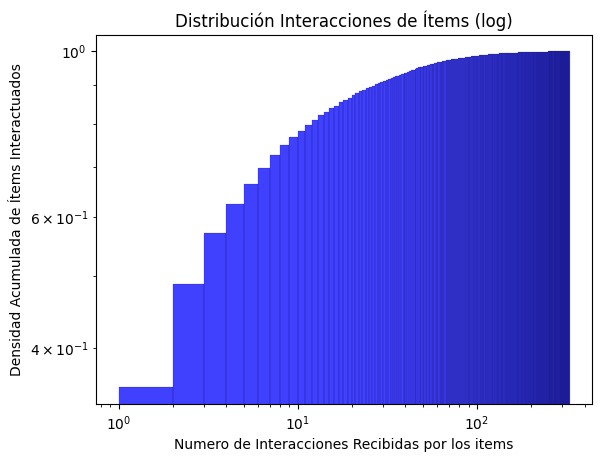

In [3]:

item_counts = movies['movieId'].value_counts()


sns.histplot(item_counts, bins=range(1, item_counts.max() + 2), color='blue', cumulative=True, stat='density')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Numero de Interacciones Recibidas por los items')
plt.ylabel('Densidad Acumulada de Ítems Interactuados')
plt.title('Distribución Interacciones de Ítems (log)')
plt.show()


Aqui podemos observar que a medida que va creciendo el numero de interacciones recibidas por items, el salto del grafico acumulado (paso en "y"), se hace mas pequeño. Esto se interpreta como que la gran mayoria de las peliculas, tienen muy pocas interacciones. 

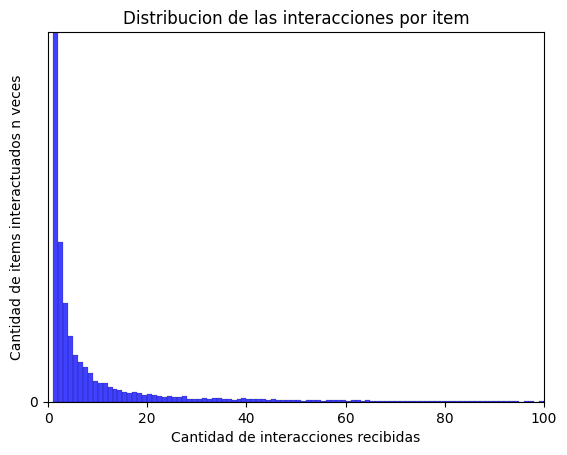

In [4]:

item_counts = movies['movieId'].value_counts()

# Create a histogram
sns.histplot(item_counts, bins=range(1, item_counts.max() + 2), color='blue')
plt.xlabel('Cantidad de interacciones recibidas')
plt.ylabel('Cantidad de items interactuados n veces')
plt.title('Distribucion de las interacciones por item')
plt.yticks(range(0, item_counts.max() + 1, 5000))
plt.xlim(0, 100)
plt.ylim(0, 3000)
plt.show()

# ME ASEGURO UN MINIMO DE SOLAPAMIENTO EN INTERACCIONES DE USUARIOS E ITEMS Y CON ESTO GENERO RECOMENDACIONES

In [5]:
min_interactions_user = 25
min_interactions_items = 55

user_overlap_idx = user_item_matrix.apply(lambda x: np.sum(~x.isna()), axis = 1) >= min_interactions_user
item_overlap_idx = user_item_matrix.apply(lambda x: np.sum(~x.isna()), axis = 0) >= min_interactions_items

user_item_matrix_overlap = user_item_matrix.loc[user_overlap_idx, item_overlap_idx]
user_item_matrix_overlap.shape

(547, 392)

## Del total de datos, me termino quedando con un 30% de los usuarios y un 10.8% de los items

In [6]:
user_item_matrix_overlap.shape[0] / user_item_matrix.shape[0]*100, round(user_item_matrix_overlap.shape[1] / user_item_matrix.shape[1]*100, 2)

(89.67213114754098, 4.03)

# TIEMPO DE COMPUTO CON UN SAMPLEO PEQUEÑO

In [ ]:
from utils.collaborative_filtering import compute_item_similarity, compute_neighbors, compute_prediction

sim = compute_item_similarity(user_item_matrix_overlap)

# PREDICCION

In [19]:
u=610
i=16

compute_prediction(u, i, user_item_matrix_overlap, sim)

4.616955021566264

In [ ]:
# revisar que el mapeo de indices ande bien


In [17]:
user_item_matrix_overlap

movieId,1,2,6,10,11,16,17,19,21,25,...,74458,78499,79132,80463,81845,89745,91529,99114,109487,112852
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,4.0,NaN,NaN,NaN,3.5,3.5,3.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,2.5,NaN,4.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,NaN,4.0,NaN,4.5,NaN,2.0,3.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
matrix_test = np.array([[5, 3, np.nan,      2, 2, 2],
                        [4, 3,      4, np.nan, 3, 3],
                        [5, 2,      5,      2, 1, 1],
                        [3, 5,      3, np.nan, 1, 1],
                        [3, 3,      3,      2, 4, 5],
                        [2, 3,      2,      3, 5, 5],
                        [np.nan, np.nan, np.nan, np.nan, np.nan, 2]])

matrix_test

array([[ 5.,  3., nan,  2.,  2.,  2.],
       [ 4.,  3.,  4., nan,  3.,  3.],
       [ 5.,  2.,  5.,  2.,  1.,  1.],
       [ 3.,  5.,  3., nan,  1.,  1.],
       [ 3.,  3.,  3.,  2.,  4.,  5.],
       [ 2.,  3.,  2.,  3.,  5.,  5.],
       [nan, nan, nan, nan, nan,  2.]])

In [36]:
pd.DataFrame(matrix_test)

,0,1,2,3,4,5
0,5.0,3.0,NaN,2.0,2.0,2.0
1,4.0,3.0,4.0,NaN,3.0,3.0
2,5.0,2.0,5.0,2.0,1.0,1.0
3,3.0,5.0,3.0,NaN,1.0,1.0
4,3.0,3.0,3.0,2.0,4.0,5.0
5,2.0,3.0,2.0,3.0,5.0,5.0
6,NaN,NaN,NaN,NaN,NaN,2.0


In [7]:
from utils.collaborative_filtering import compute_item_similarity, compute_neighbors, compute_prediction


# pred helle startreck
u = 3
i = 1


sim = compute_item_similarity(pd.DataFrame(matrix_test))
compute_prediction(u, i, pd.DataFrame(matrix_test), sim)

Computing Similarities: 100%|██████████| 6/6 [00:00<00:00, 87.72item/s]


3.0

In [3]:
matrix_test = np.array([[5, 3, np.nan,      2, 2, 2],
                        [4, 3,      4, np.nan, 3, 3],
                        [5, 2,      5,      2, 1, 1],
                        [3, 5,      3, np.nan, 1, 1],
                        [3, 3,      3,      2, 4, 5],
                        [2, 3,      2,      3, 5, 5],])

matrix_test

array([[ 5.,  3., nan,  2.,  2.,  2.],
       [ 4.,  3.,  4., nan,  3.,  3.],
       [ 5.,  2.,  5.,  2.,  1.,  1.],
       [ 3.,  5.,  3., nan,  1.,  1.],
       [ 3.,  3.,  3.,  2.,  4.,  5.],
       [ 2.,  3.,  2.,  3.,  5.,  5.]])